In [1]:
from matplotlib import pyplot as plt
from spmf import Spmf
from ERMiner import ERMiner
from io import StringIO
import pandas as pd
import sys
import re

In [2]:
plt.rcParams['figure.figsize'] = [10, 6]
font = {'family' : 'consolas',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)
tmp = sys.stdout

In [3]:
def plot_results(x, erminer_times, spmf_times, plot_name: str = ""):
    fig, ax = plt.subplots()
    plt.grid(True)
    plt.xlabel('Próg wsparcia (min_sup)')
    plt.ylabel('Czas wykonania [s]')
    plt.title(plot_name)
    line1, = ax.plot(x, erminer_times, 'bs', label='Własny ERMiner')
    line2, = ax.plot(x, spmf_times, 'rs', label='SPMF ERMiner')
    ax.legend(handles=[line1, line2])

In [4]:
def custom_erminer_results(support_values, filename, confidence):
    erminer_times = []
    erminer_rules = []
    for support in support_values:
        erminer = ERMiner(filename, min_sup=support, min_con=confidence)
        result = erminer.run(printing=False)
        erminer_times.append(result[0])
        erminer_rules.append(result[1])
    return erminer_times, erminer_rules

In [5]:
def spmf_erminer_results(support_values, filename, confidence):
    spmf_times = []
    spmf_rules = []
    for support in support_values:
        buffer = StringIO()
        sys.stdout = buffer
        spmf = Spmf("ERMiner", input_filename=filename,
                output_filename="data/output.txt", arguments=[support, confidence])
        spmf.run()
        print_output = buffer.getvalue()
        spmf_times.append(int(re.findall('\d+',print_output)[2]) / 1000)
        spmf_rules.append(int(re.findall('\d+',print_output)[1]))
        tmp = sys.stdout
    return spmf_times, spmf_rules

In [6]:
def print_number_of_rules(support_values, erminer_rules, spmf_rules):
    print(" min sup |  custom  | SPMF :")
    for sup, rules1, rules2 in zip(support_values, erminer_rules, spmf_rules):
        print(f"{sup}  |  {rules1}  |  {rules2}")

In [7]:
def rule_stats_to_csv(support_values, erminer_rules, spmf_rules, filename: str = "results/output.csv"):
    colnames = {'min_support': support_values, 'rules custom': erminer_rules, 'rules spmf': spmf_rules}
    df = pd.DataFrame(colnames)
    df.to_csv(filename, index=False)


E-SHOP

In [8]:
support_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.45, 0.4, 0.35, 0.3, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22]

In [9]:
t1, r1 = custom_erminer_results(support_values, "data/eshop.txt", confidence=0.7)
t2, r2 = spmf_erminer_results(support_values, "data/eshop.txt", confidence=0.7)
rule_stats_to_csv(support_values, r1, r2, "results/eshop.csv")

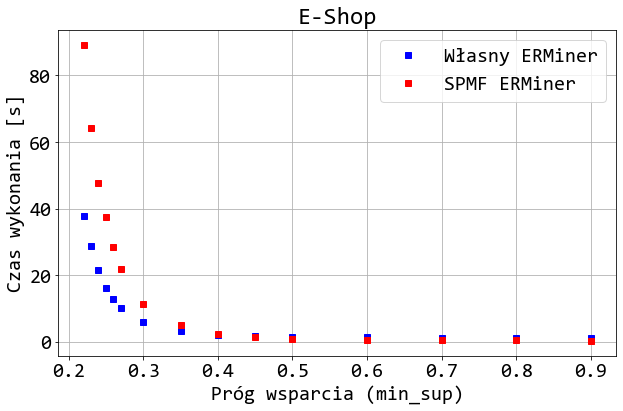

In [10]:
plot_results(support_values, t1, t2, plot_name = "E-Shop")


SIGN

In [11]:
t1, r1 = custom_erminer_results(support_values, "data/sign.txt", confidence=0.7)
t2, r2 = spmf_erminer_results(support_values, "data/sign.txt", confidence=0.7)
rule_stats_to_csv(support_values, r1, r2, "results/sign.csv")

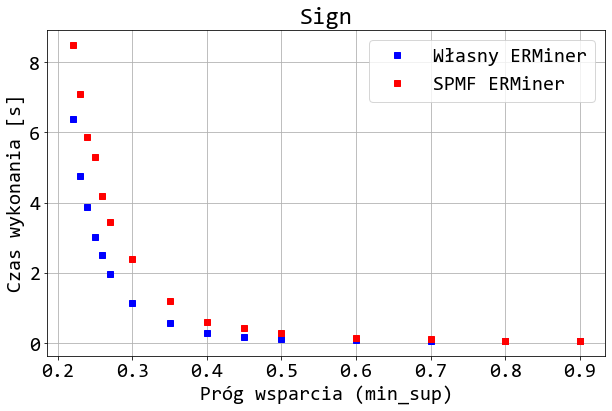

In [12]:
plot_results(support_values, t1, t2, plot_name = "Sign")


MSNBC

In [20]:
support_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.45, 0.4, 0.35, 0.3, 0.27, 0.25, 0.23, 0.2, 0.18, 0.16, 0.14, 0.12, 0.1]
t1, r1 = custom_erminer_results(support_values, "data/msnbc.txt", confidence=0.7)
t2, r2 = spmf_erminer_results(support_values, "data/msnbc.txt", confidence=0.7)
rule_stats_to_csv(support_values, r1, r2, "results/msnbc.csv")

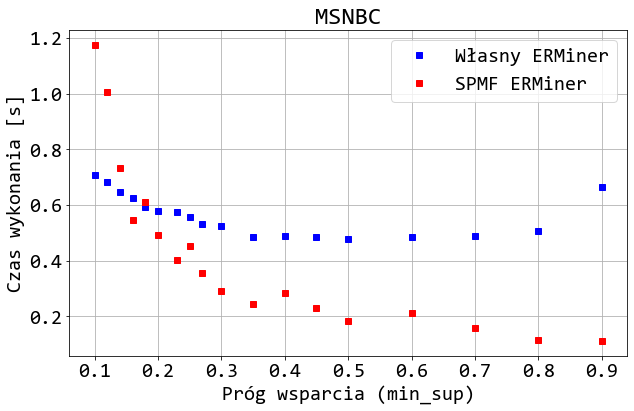

In [21]:
plot_results(support_values, t1, t2, plot_name = "MSNBC")


FIFA

In [15]:
support_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.45, 0.4, 0.35, 0.3, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22]
t1, r1 = custom_erminer_results(support_values, "data/fifa.txt", confidence=0.7)
t2, r2 = spmf_erminer_results(support_values, "data/fifa.txt", confidence=0.7)
rule_stats_to_csv(support_values, r1, r2, "results/fifa.csv")

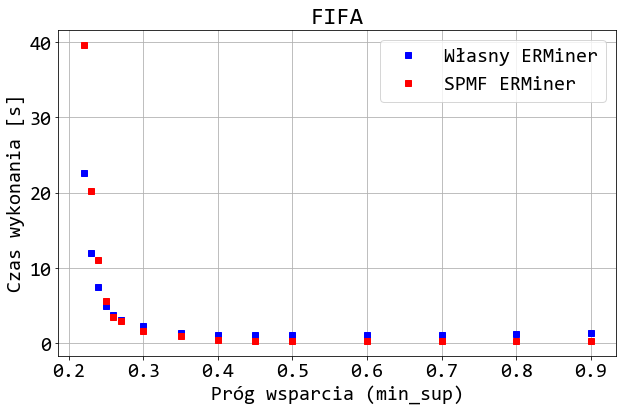

In [16]:
plot_results(support_values, t1, t2, plot_name = "FIFA")


Microblog

In [22]:
support_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.45, 0.4, 0.35, 0.3, 0.27, 0.25, 0.23, 0.2, 0.18, 0.16, 0.14, 0.12, 0.1]
t1, r1 = custom_erminer_results(support_values, "data/microblog.txt", confidence=0.7)
t2, r2 = spmf_erminer_results(support_values, "data/microblog.txt", confidence=0.7)
rule_stats_to_csv(support_values, r1, r2, "results/microblog.csv")

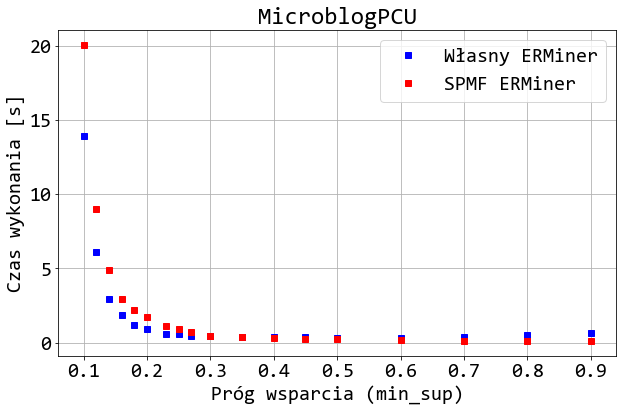

In [23]:
plot_results(support_values, t1, t2, plot_name="MicroblogPCU")

In [27]:
support_values = [0.4, 0.35, 0.3, 0.27, 0.25, 0.23, 0.2, 0.18, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11, 0.10, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]
t1, r1 = custom_erminer_results(support_values, "data/kosarak.txt", confidence=0.7)
t2, r2 = spmf_erminer_results(support_values, "data/kosarak.txt", confidence=0.7)
rule_stats_to_csv(support_values, r1, r2, "results/kosarak.csv")

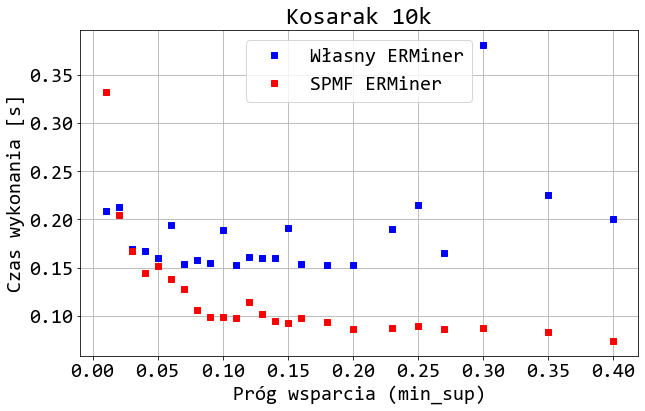

In [28]:
plot_results(support_values, t1, t2, plot_name="Kosarak 10k")